#### **Import Library**

In [151]:
import cv2                      # Untuk membaca gambar
import numpy as np              # Untuk manipulasi array dan gambar
import matplotlib.pyplot as plt # Untuk menampilkan gambar
import math                     # Untuk operasi matematika (sqrt)

#### **Membaca dan Mengkonversi Gambar**

In [152]:
img = cv2.imread('cutie.jpg') # Membaca gambar dalam format BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengubah BGR menjadi RGB dengan slicing

Menampilkan Ukuran Gambar

In [153]:
# Mendapatkan ukuran gambar
height, width, _ = rgb.shape
print(f"Ukuran gambar: {width} x {height}")

Ukuran gambar: 720 x 720


Menampilkan Gambar Asli

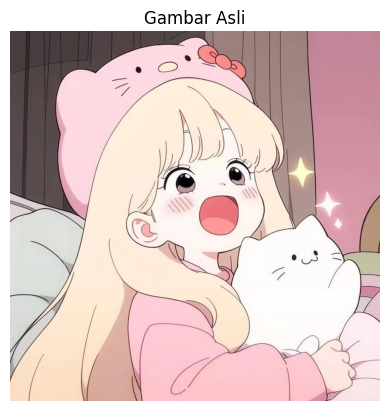

In [154]:
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

#### **Konversi Grayscale**

Fungsi Konversi ke Grayscale dengan Rumus Luminance

In [155]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Rumus standar konversi RGB ke grayscale
    return gray

Proses Konversi RGB ke Grayscale

In [156]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]  # Ambil pixel di koordinat (y,x)
        r, g, b = pixel
        gray = convert_to_grayscale(pixel)
        row.append(gray)

        # Menampilkan nilai piksel tiap 100 piksel sebagai sampel
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> R: {r}, G: {g}, B: {b}, Gray: {gray}')
    grayscale_img.append(row)

Pixel[0,0] -> R: 72, G: 61, B: 65, Gray: 64
Pixel[0,100] -> R: 74, G: 65, B: 66, Gray: 67
Pixel[0,200] -> R: 81, G: 69, B: 71, Gray: 72
Pixel[0,300] -> R: 47, G: 37, B: 36, Gray: 39
Pixel[0,400] -> R: 156, G: 127, B: 129, Gray: 135
Pixel[0,500] -> R: 153, G: 128, B: 124, Gray: 135
Pixel[0,600] -> R: 193, G: 134, B: 152, Gray: 153
Pixel[0,700] -> R: 193, G: 134, B: 152, Gray: 153
Pixel[100,0] -> R: 81, G: 69, B: 69, Gray: 72
Pixel[100,100] -> R: 251, G: 229, B: 232, Gray: 235
Pixel[100,200] -> R: 253, G: 217, B: 227, Gray: 228
Pixel[100,300] -> R: 84, G: 59, B: 65, Gray: 67
Pixel[100,400] -> R: 58, G: 32, B: 33, Gray: 39
Pixel[100,500] -> R: 160, G: 132, B: 129, Gray: 140
Pixel[100,600] -> R: 199, G: 136, B: 153, Gray: 156
Pixel[100,700] -> R: 199, G: 136, B: 153, Gray: 156
Pixel[200,0] -> R: 86, G: 74, B: 76, Gray: 77
Pixel[200,100] -> R: 224, G: 174, B: 186, Gray: 190
Pixel[200,200] -> R: 255, G: 237, B: 228, Gray: 241
Pixel[200,300] -> R: 255, G: 238, B: 220, Gray: 241
Pixel[200,400]

Konversi Hasil Grayscale ke Array Numpy

In [157]:
grayscale_img = np.array(grayscale_img, dtype=np.uint8)
grayscale_img

array([[ 64,  64,  64, ..., 151, 151, 151],
       [ 64,  64,  64, ..., 151, 151, 151],
       [ 64,  64,  64, ..., 151, 151, 151],
       ...,
       [228, 228, 228, ..., 235, 235, 235],
       [228, 228, 228, ..., 235, 235, 235],
       [228, 228, 228, ..., 234, 234, 234]], dtype=uint8)

Menampilkan Gambar Hasil Konversi Grayscale

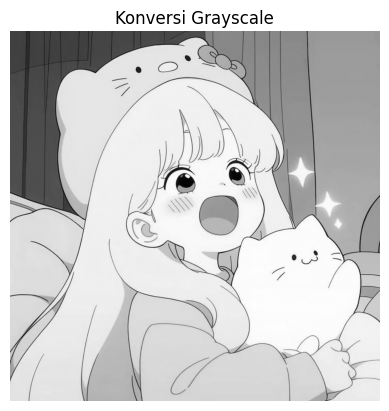

In [158]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Konversi Grayscale')
plt.show()

#### **Operator Sobel**

Mendefinisikan Kernel Sobel untuk Menghitung Gradient

In [159]:
Gx_kernel = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

Gy_kernel = np.array([[-1, -2, -1],
                      [ 0,  0,  0],
                      [ 1,  2,  1]])

Mendefinisikan Fungsi Oprator Sobel

In [160]:
# --- Fungsi deteksi tepi Sobel manual ---
def apply_sobel_operator(img):
    rows, cols = img.shape
    # Padding 0 agar bisa ambil window 3x3 di pinggir
    img_padded = np.pad(img, ((1,1),(1,1)), mode='constant', constant_values=0)
    gradient_magnitude = np.zeros((rows, cols), dtype=np.int32)

    for y in range(1, rows + 1):
        for x in range(1, cols + 1):
            region = img_padded[y-1:y+2, x-1:x+2]
            gx = np.sum(Gx_kernel * region)
            gy = np.sum(Gy_kernel * region)
            magnitude = int(math.sqrt(gx**2 + gy**2))
            gradient_magnitude[y-1, x-1] = min(magnitude, 255)

    return gradient_magnitude.astype(np.uint8)

Memanggil Fungsi dan Simpan Hasilnya

In [161]:
edges = apply_sobel_operator(grayscale_img)
edges

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   4,   4, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Menampilkan Gambar Hasil Deteksi Tepi (Edge Detection)

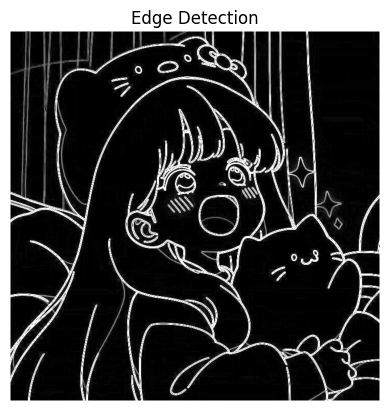

In [162]:
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()